# Classifying cifar-10 images with 2D-CNN

### Read cifar-10 data

In [3]:
import numpy as np
train = np.load('C:\\Piazza\\Activity Lab\\CNN-Lab\\cifar10_cnn1\\cifar10_cnn\\cifar_train.npz')
x_train = train['data']                # Two Key Words In The Above Dictionary Of Arrays.
train_labels = train['labels']         # 1. Word, 2. Lables.        It Will result corresponding values of them.

test = np.load('C:\\Piazza\\Activity Lab\\CNN-Lab\\cifar10_cnn1\\cifar10_cnn\\cifar_test.npz')
x_test = test['data']
test_labels = test['labels']

print('train_data:', x_train.shape)               # 50000 samples/images with size of 32*32  3 Dimentions (RGB)
print('train_labels:', train_labels.shape)
print('test_data:', x_test.shape)
print('test_labels:', test_labels.shape)

train_data: (50000, 32, 32, 3)
train_labels: (50000, 1)
test_data: (10000, 32, 32, 3)
test_labels: (10000, 1)


In [ ]:
# Note:
# All the images should be of the same size.
# If not Scale them and make all the images same size.

### Plotting a few train images

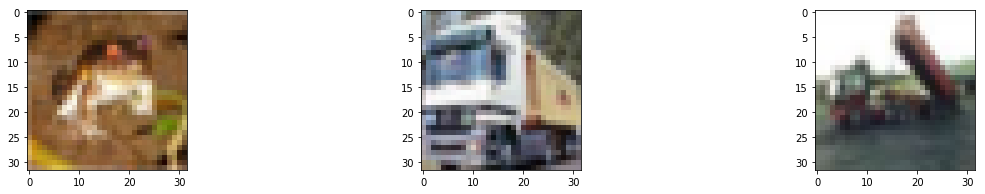

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.imshow(x_train[0])
plt.subplot(3,3,2)
plt.imshow(x_train[1])
plt.subplot(3,3,3)
plt.imshow(x_train[2])

### Training a CNN for classification

In [10]:
batch_size = 32
nb_classes = 10
nb_epoch = 10

img_rows, img_cols = 32, 32    # input image dimensions
img_channels = 3               # The CIFAR10 images are RGB.

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

# Convert class vectors to binary class matrices.
from keras.utils import to_categorical
y_train = to_categorical(train_labels, nb_classes)
y_test = to_categorical(test_labels, nb_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [9]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [7]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', 
                        input_shape=(img_rows,img_cols,img_channels), 
                        activation='relu'))
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [10]:
model.fit(x_train[:50000], y_train[:50000],
          batch_size=batch_size,
          epochs=nb_epoch,
          validation_data=(x_test[:10000], y_test[:10000]),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 384s 8ms/step - loss: 1.5455 - acc: 0.4378 - val_loss: 1.1532 - val_acc: 0.5859
Epoch 2/10
50000/50000 [==============================] - 368s 7ms/step - loss: 1.1405 - acc: 0.5926 - val_loss: 0.9795 - val_acc: 0.6575
Epoch 3/10
50000/50000 [==============================] - 381s 8ms/step - loss: 0.9915 - acc: 0.6496 - val_loss: 0.8522 - val_acc: 0.7024
Epoch 4/10
50000/50000 [==============================] - 370s 7ms/step - loss: 0.8986 - acc: 0.6844 - val_loss: 0.7976 - val_acc: 0.7248
Epoch 5/10
50000/50000 [==============================] - 381s 8ms/step - loss: 0.8309 - acc: 0.7073 - val_loss: 0.7595 - val_acc: 0.7356
Epoch 6/10
50000/50000 [==============================] - 368s 7ms/step - loss: 0.7863 - acc: 0.7250 - val_loss: 0.7588 - val_acc: 0.7335
Epoch 7/10
50000/50000 [==============================] - 354s 7ms/step - loss: 0.7523 - acc: 0.7353 - val_loss: 0.7030 - 